**Objetivo do Projeto**

O objetivo é realizar uma análise de sentimentos em textos do Twitter, aplicando várias técnicas de pré-processamento e modelagem para melhorar a precisão da classificação dos sentimentos.

***

# Análise Exploratória dos Dados

In [1]:
# Importando a biblioteca pandas

import pandas as pd

## Importando os dados

In [2]:
# Importando os DataFrames para treino e validação a partir dos arquivos CSV

twitter_training = pd.read_csv('/content/drive/MyDrive/Análise de sentimentos twitter/twitter_training.csv')
twitter_validation = pd.read_csv('/content/drive/MyDrive/Análise de sentimentos twitter/twitter_validation.csv')

## Visualizando os Data Frames

In [3]:
# Exibindo as primeiras linhas do DataFrame de treino para verificar a estrutura dos dados


twitter_training.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
# Exibindo as primeiras linhas do DataFrame de validação para verificar a estrutura dos dados

twitter_validation.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


## Acrescentando os nomes para as colunas e excluindo a coluna id

In [5]:
# Nomeando as colunas dos DataFrames para nomes descritivos e consistentes
# Isto facilita a identificação e manipulação das colunas nos passos seguintes

twitter_training.columns=['id','organization','sentiment','text']
twitter_validation.columns=['id','organization','sentiment','text']

In [6]:
# Removendo a coluna 'id' dos DataFrames, pois não é necessária para a análise de sentimentos
# A coluna 'id' pode ser usada para rastreamento, mas não é útil para o modelo de sentimentos

twitter_training.drop(columns=['id'],inplace=True)
twitter_validation.drop(columns=['id'],inplace=True)

In [7]:
# Exibindo as primeiras linhas do DataFrame de treino após a limpeza para confirmar as alterações

twitter_training.head()

,organization,sentiment,text
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


In [8]:
# Exibindo as primeiras linhas do DataFrame de validação após a limpeza para confirmar as alterações

twitter_validation.head()

,organization,sentiment,text
0,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Google,Neutral,Now the President is slapping Americans in the...
4,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


## Tratamento final para começar o NLP

**Mapearemos a coluna 'sentiment' para criar um coluna numerica baseada nela. Depois iremos conferir a proporção da variável 'sentiment' para conseguirmos fazer uma *análise de sentimentos* sem nenhuma poluição de entendimento. Por fim confirmaremos a existência de dados nulos ou faltantes**

In [9]:
# Exibindo os sentimentos únicos presentes na coluna 'sentiment' dos DataFrames de treino e validação
# Isto é útil para entender quais categorias de sentimento estão presentes e como serão mapeadas

print(twitter_training['sentiment'].unique())
print('*'*30)
print(twitter_validation['sentiment'].unique())

['Positive' 'Neutral' 'Negative' 'Irrelevant']
******************************
['Neutral' 'Negative' 'Positive' 'Irrelevant']


Criando uma coluna numerica representando a coluna sentiment


In [10]:
# Criando um dicionário para mapear os valores de sentimento para números
# Este mapeamento é necessário para converter dados categóricos em dados numéricos que os algoritmos de ML podem processar

sentiment_mapping = {
    'Positive': 1,    # Sentimentos positivos são mapeados para 1
    'Neutral': 2,     # Sentimentos neutros são mapeados para 2
    'Negative': 0,    # Sentimentos negativos são mapeados para 0
    'Irrelevant': 3   # Sentimentos irrelevantes são mapeados para 3
}

# Aplicando o mapeamento de sentimentos aos DataFrames de treino e validação
# A nova coluna 'classification' conterá os valores numéricos correspondentes aos sentimentos

twitter_training['classification'] = twitter_training['sentiment'].map(sentiment_mapping)
twitter_validation['classification'] = twitter_validation['sentiment'].map(sentiment_mapping)

***
Adicionei a coluna 'classification' a ambos os DataFrames, utilizando a coluna 'sentiment' como base.

A coluna 'classification' contém valores numéricos correspondentes aos sentimentos categóricos.

Esta transformação é crucial para que possamos utilizar a coluna 'classification' como variável alvo em nossos algoritmos de machine learning.
***

In [11]:
# Exibindo as informações dos DataFrames de treino e validação para verificar a inclusão da nova coluna

twitter_training.info()
print('\n\n')
twitter_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   organization    74681 non-null  object
 1   sentiment       74681 non-null  object
 2   text            73995 non-null  object
 3   classification  74681 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.3+ MB



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   organization    999 non-null    object
 1   sentiment       999 non-null    object
 2   text            999 non-null    object
 3   classification  999 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 31.3+ KB


***
Vamos verificar se os dados estão relativamente iguais(tamanho parecido em relação a variavel sentiment), pois não pode ter muita desbalanço entre as classificação

In [12]:
# Vamos contar o sentimentos utilizando o metodo value_counts() o qual consegue perceber os diferentes valores dentro de uma variável e conta-lós

print(f'Contagem de sentimentos (treino):\n{twitter_training.sentiment.value_counts()}\n')
print('*'*15)
print(f'\nContagem de sentimentos (validação):\n{twitter_validation.sentiment.value_counts()}')

Contagem de sentimentos (treino):
sentiment
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

***************

Contagem de sentimentos (validação):
sentiment
Neutral       285
Positive      277
Negative      266
Irrelevant    171
Name: count, dtype: int64


***
Os dois DataFrames estão devidamente alinhados, proporções aceitáveis em relação aos sentimentos, colunas consistentes e sem dados nulos. Podemos, portanto, iniciar o pré-processamento necessário e a análise de sentimentos.
***

# Processamento de linguagem natural (Natural Processing Language - NLP) e Análise de Sentimentos



***
Antes de utlizarmos os algoritmos de machine learning para análise de sentimentos. Precisamos utilizar as técnicas de NLP para passarmos a linguagem humana para linguagem de máquina
***

Para o processamento de linguagem natural(NLP), utilizaremos as seguintes técnicas:

* **Bag of Words:** Atribui um valor a cada palavra no texto, indicando a presença ou ausência (1 ou 0) das palavras distintas. Essa técnica auxilia na distinção de sentimentos em cada frase.

* **WordCloud:** Permite visualizar as principais palavras utilizadas pelo algoritmo na análise de sentimentos, destacando as palavras mais frequentes.

* **Tokenização:** Separa o texto em palavras ou tokens, facilitando a análise individual dos termos.

* **Pareto:** Gera um gráfico de barras com as palavras mais relevantes, permitindo identificar rapidamente os termos mais utilizados pelo algoritmo.

* **Stop Words:** Remove palavras que não contribuem para a análise de sentimentos, como artigos e preposições, além de pontuações e acentuações. Para garantir uma filtragem precisa, o texto é primeiramente convertido para minúsculas, facilitando a remoção das stopwords de forma consistente e eficaz.

* **Acurácia:** Métrica utilizada para avaliar os resultados do modelo de análise de sentimentos.

* **Stemming:** Reduz as palavras às suas raízes, normalizando diferentes formas de uma mesma palavra para um único radical.

* **TF-IDF:** Atribui um peso às palavras, dando maior valor às que têm o "poder" de diferenciar os sentimentos.

* **Ngrams:** Mantém a sequência de palavras no texto, preservando alguma lógica e contexto após o pré-processamento.

* **Regressão Logística:** Método de classificação utilizado para prever a variável resposta com base em variáveis explicativas.

* **lemmatization:** Reduz as palavras às suas formas básicas, mantendo o significado original e preservando o contexto, o que melhora a interpretação do texto pelo modelo.

* **Tratamento de URLs:** Remove URLs do texto para evitar que links e endereços web influenciem a análise de sentimentos. URLs são identificadas e substituídas por espaço, assegurando que o texto analisado se concentre apenas nas palavras relevantes.

***


##Primeiro Tratamento:

***
Precisamos unir todas as frases em uma variável e unir as frases em um unico elemento para tokenizar depois
***

In [13]:
# Substituindo valores nulos por uma string vazia e convertendo todos os valores para string

twitter_training['text'] = twitter_training['text'].fillna('').astype(str)
twitter_validation['text'] = twitter_validation['text'].fillna('').astype(str)

# Unindo todas as avaliações em uma variável

all_words_training = [text for text in twitter_training['text']]
all_words_validation = [text for text in twitter_validation['text']]

# Unindo todas as frases em um unico elemento

all_words_training = ' '.join(all_words_training)
all_words_validation = ' '.join(all_words_validation)

# Exibindo o resultado para verificar

print(all_words_training[:1000])  # Exibindo os primeiros 1000 caracteres para evitar sobrecarregar a saída


I am coming to the borders and I will kill you all, im getting on borderlands and i will kill you all, im coming on borderlands and i will murder you all, im getting on borderlands 2 and i will murder you me all, im getting into borderlands and i can murder you all, So I spent a few hours making something for fun. . . If you don't know I am a HUGE @Borderlands fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Here is the original image versus the creation I made :) Enjoy! pic.twitter.com/mLsI5wf9Jg So I spent a couple of hours doing something for fun... If you don't know that I'm a huge @ Borderlands fan and Maya is one of my favorite characters, I decided to make a wallpaper for my PC.. Here's the original picture compared to the creation I made:) Have fun! pic.twitter.com / mLsI5wf9Jg So I spent a few hours doing something for fun... If you don't know I'm a HUGE @ Borderlands fan and Maya is one of my favorite characters. So I spent a

In [14]:
# Utilizando a biblioteca NLTK iremos tokenizar as palavras

!pip install nltk # Instalando a biblioteca
import nltk
nltk.download('all') # Baixando todos os modulos da biblioteca nltk


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [15]:
# Importando o modulo necessario para essa etapa do pre-processamento de texto

from nltk import word_tokenize

In [16]:
# Função para tokenização

def preprocess_text(text):
  text = text.lower() # Normalizando todas as letras para minúsculo
  tokens = word_tokenize(text) # Tokenizando(separando) o texto
  tokens = [word for word in tokens if word.isalpha()] # Removendo as pontuações
  return tokens

In [17]:
# Aplicando a função preprocess_text e criando uma nova coluna

twitter_training['processed_text_1'] = twitter_training['text'].apply(preprocess_text)
twitter_validation['processed_text_1'] = twitter_validation['text'].apply(preprocess_text)

Visualizando os data frames depois do 1° Pré-processamento

In [18]:
# Data Frame de treino

twitter_training['processed_text_1']

,processed_text_1
0,"[i, am, coming, to, the, borders, and, i, will..."
1,"[im, getting, on, borderlands, and, i, will, k..."
2,"[im, coming, on, borderlands, and, i, will, mu..."
3,"[im, getting, on, borderlands, and, i, will, m..."
4,"[im, getting, into, borderlands, and, i, can, ..."
...,...
74676,"[just, realized, that, the, windows, partition..."
74677,"[just, realized, that, my, mac, window, partit..."
74678,"[just, realized, the, windows, partition, of, ..."
74679,"[just, realized, between, the, windows, partit..."


In [19]:
# Data Frame de validação

twitter_validation.head()

,organization,sentiment,text,classification,processed_text_1
0,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,2,"[bbc, news, amazon, boss, jeff, bezos, rejects..."
1,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,0,"[microsoft, why, do, i, pay, for, word, when, ..."
2,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",0,"[csgo, matchmaking, is, so, full, of, closet, ..."
3,Google,Neutral,Now the President is slapping Americans in the...,2,"[now, the, president, is, slapping, americans,..."
4,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,0,"[hi, eahelp, i, ve, had, madeleine, mccann, in..."


***
Estamos enfrentando um problema com a coluna processed_text_1 em ambos os DataFrames, onde os dados estão atualmente formatados como listas, com cada palavra representada como um elemento separado por vírgulas. Esta formatação não atende às nossas necessidades. Vamos proceder com a correção para garantir que a coluna contenha o texto processado no formato desejado.
***

In [20]:
# Função para juntar as palavras com o espaço

def tokens_to_string(tokens):
    return ' '.join(tokens)

In [21]:
# Aplicando a função no data frame

twitter_training['processed_text_1'] = twitter_training['processed_text_1'].apply(tokens_to_string)
twitter_validation['processed_text_1'] = twitter_validation['processed_text_1'].apply(tokens_to_string)

Visualizando novamente os dataframes para confirmar a correção

In [22]:
# Data Frame de treino

twitter_training.head()

,organization,sentiment,text,classification,processed_text_1
0,Borderlands,Positive,I am coming to the borders and I will kill you...,1,i am coming to the borders and i will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...,1,im getting on borderlands and i will kill you all
2,Borderlands,Positive,im coming on borderlands and i will murder you...,1,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,1,im getting on borderlands and i will murder yo...
4,Borderlands,Positive,im getting into borderlands and i can murder y...,1,im getting into borderlands and i can murder y...


In [23]:
# Data Frame de validação

twitter_validation.head()

,organization,sentiment,text,classification,processed_text_1
0,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,2,bbc news amazon boss jeff bezos rejects claims...
1,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,0,microsoft why do i pay for word when it functi...
2,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",0,csgo matchmaking is so full of closet hacking ...
3,Google,Neutral,Now the President is slapping Americans in the...,2,now the president is slapping americans in the...
4,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,0,hi eahelp i ve had madeleine mccann in my cell...


Utilizaremos a técnica de Pareto para identificar as palavras mais frequentes em nosso conjunto de dados. Em seguida, aplicaremos a técnica de World Cloud para visualizar a distribuição e a frequência dessas palavras, permitindo-nos entender quais termos são mais utilizados em nossos textos

**CRIANDO A WORD CLOUD**

In [24]:
# A entrada para a WordCloud não é uma lista de frases,
# mas sim uma variável contendo todas as palavras.
# Portanto, precisamos passar a coluna do DataFrame para uma variável.

# Nesta primeira função faremos a união das palavras

import matplotlib.pyplot as plt
from wordcloud import WordCloud

def combine_text(df,column):
  all_word = [text for text in df[column]] # Cria uma lista contendo todas as entradas (linhas) na coluna especificada do DataFrame
  all_word = ' '.join(all_word) # Une todas as entradas em uma única string, separadas por espaços
  return all_word

# Função para gerar a WordCloud a partir do texto combinado
def cloud_word(text):

  # Gerando a nuvem
  cloud = WordCloud().generate(text)# Gera a WordCloud a partir do texto combinado

  # Gerando a imagem
  plt.figure(figsize=(10,6)) # Ajusta o tamanho da figura
  plt.imshow(cloud, interpolation='bilinear') # Exibe a WordCloud com interpolação suave
  plt.axis('off') # Removendo os eixos
  plt.show() # Exibe a figura


**CRIANDO PARETO**

In [25]:
from nltk import tokenize
import seaborn as sns

def pareto(text,column,qtd):
  # Combina todas as palavras da coluna especificada em uma única string
  all_word = ' '.join([text for text in text[column]])

  # Inicializa o tokenizador para separar palavras por espaços
  space_token = tokenize.WhitespaceTokenizer()

  # Tokeniza a string combinada em uma lista de palavras
  phrase_token = space_token.tokenize(all_word)

  # Calcula a frequência de cada palavra na lista
  frequency = nltk.FreqDist(phrase_token)

  # Cria um DataFrame com duas colunas: 'Word' e 'Frequency'
  df_frequency = pd.DataFrame({'Word': list(frequency.keys()),
                               'Frequency':list(frequency.values())})

  # Seleciona as `qtd` palavras mais frequentes do DataFrame
  df_frequency = df_frequency.nlargest(columns='Frequency',n=qtd)

  # Configura o tamanho da figura do gráfico
  plt.figure(figsize=(12,8))

  # Plota um gráfico de barras com as palavras mais frequentes
  ax=sns.barplot(data=df_frequency,x='Word',y='Frequency',color='gray')

  # Define o rótulo do eixo y
  ax.set(ylabel='Count')

  # Define o título do gráfico
  ax.set_title('Top {} Most Frequent Words'.format(qtd))

  # Exibe o gráfico
  plt.show()

**VISUALIZAÇÃO PARA DATA FRAME DE TREINAMENTO**

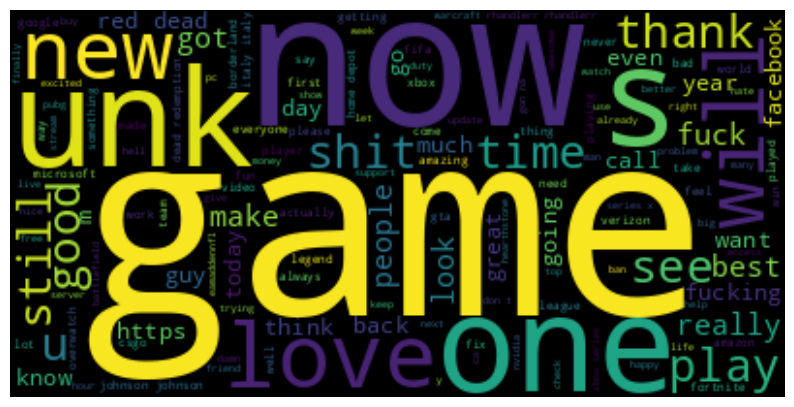

In [26]:
# Vamos observar a WordCloud do data frame: twitter_training

text_combine = combine_text(twitter_training,'processed_text_1')
cloud_word(text_combine)

***
Com esta Word Cloud, já conseguimos identificar palavras que podem ser valiosas para nossa análise de sentimentos, como love, best, good, great, fucking, shit. No entanto, algumas palavras não agregam tanto valor, como snow, day, month, italy, one, game, time, go.

Para aprimorar a seleção das palavras mais relevantes, vamos aplicar a técnica de Bag of Words, que atribuirá pesos diferentes às palavras com base na sua capacidade de diferenciar os sentimentos e contextos analisados
***

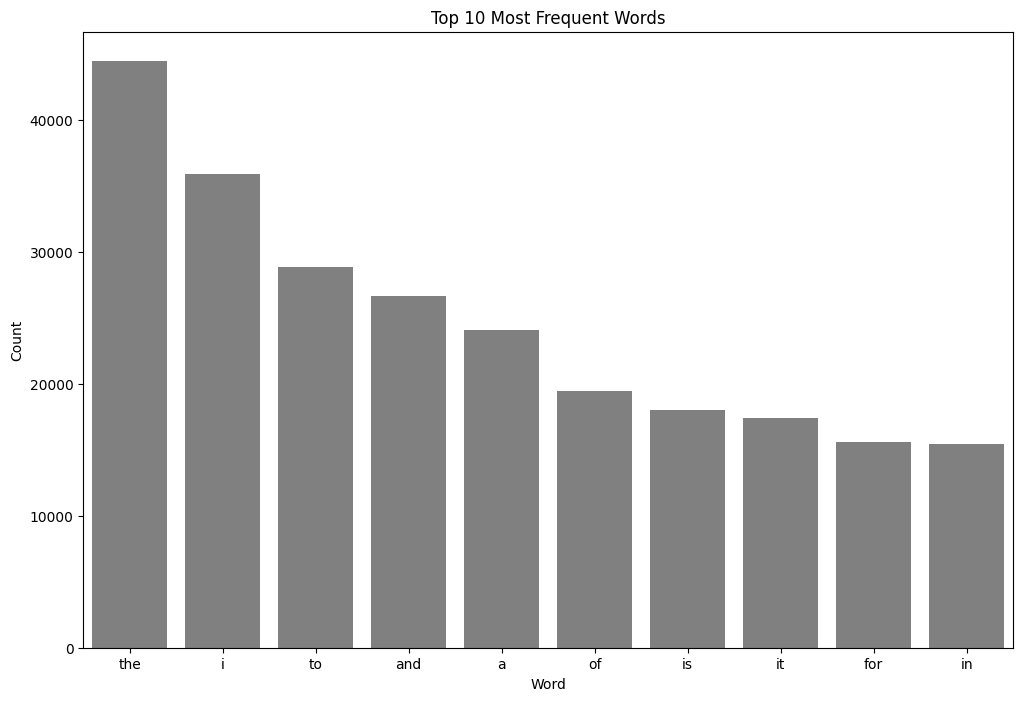

In [27]:
# Conferindo as 10 palavras com maiores frequência

pareto(twitter_training,'processed_text_1',10)

***
As palavras mais frequentes identificadas até o momento, como "the", "i", "to", "and", "a", "of", "is", "it", "for", e "in", são típicas em análises de linguagem natural, mas geralmente não agregam valor para a interpretação de sentimentos ou temas centrais. Essas palavras, conhecidas como stopwords, serão tratadas na próxima etapa de pré-processamento, garantindo que os dados relevantes sejam destacados, eliminando ruído desnecessário
***

**VISUALIZAÇÃO PARA DATA FRAME DE VALIDAÇÃO**

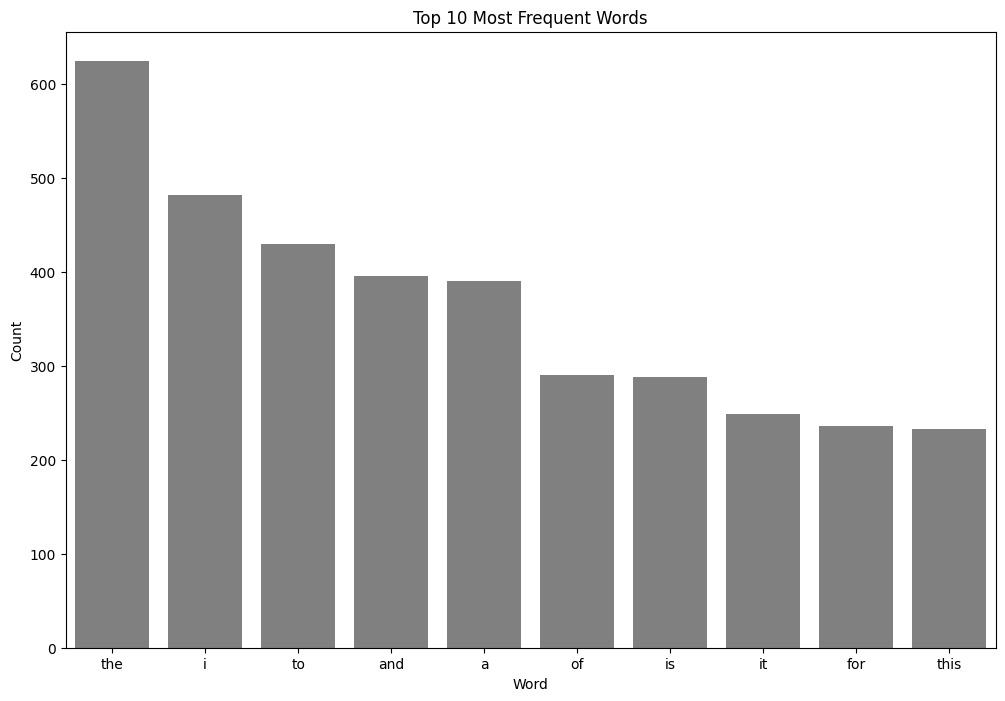

In [28]:
# Pareto
pareto(twitter_validation,'processed_text_1',10)

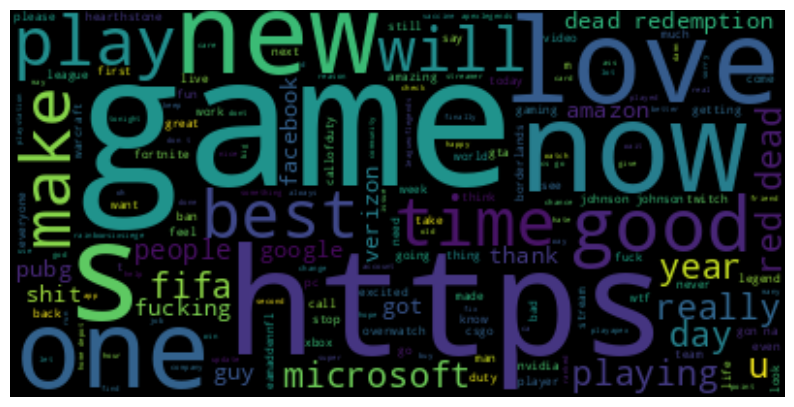

In [29]:
# Word Cloud
text_combine_validation = combine_text(twitter_validation,'processed_text_1')
cloud_word(text_combine_validation)

***
Os resultados da análise de Pareto e da Word Cloud para o DataFrame de validação mostram um panorama bastante semelhante ao que obtivemos com o DataFrame de treino. As palavras mais frequentes que apareceram são bastante comuns, como "the", "i", "to", "and", "a", "of", "is", "it", "for" e "this".

Na Word Cloud, além dessas palavras comuns, também surgem termos como "https", "best", "love", "play", "good", "now", "one", "make" e "thank". Embora esses resultados sejam muito parecidos com o que vimos antes, ainda há alguns detalhes que podem ser ajustados.

Para refinar ainda mais nossa análise, vamos aplicar a técnica de Bag of Words. Isso vai ajudar a dar um peso diferente às palavras, permitindo uma análise mais detalhada e precisa. Vamos ver como essa abordagem melhora nossa capacidade de identificar e interpretar os sentimentos no texto.

E esses resultados indicam que, assim como no DataFrame de treino, é necessário aplicar técnicas de pré-processamento, como a remoção de stop words, para refinar a análise e focar nas palavras que realmente contribuem para a compreensão dos sentimentos e temas dos textos.
***

## Segundo Tratamento

***
Com as palavras normalizadas para minúscula e sem pontuações, podemos agora aplicar a técnica de **stop words**
***

In [30]:
# Obtendo a lista de palavras irrelevantes (stopwords) em inglês usando o NLTK


irrelevant_words = nltk.corpus.stopwords.words('english')

In [31]:
# Visualizando a lista

print(irrelevant_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Trataremos nossos dados utilizando a variável **irrelevant_words**

In [32]:
# Função para aplicarmos a stop words
from nltk import tokenize

def remove_stopwords(df,column):
  # Inicializa uma lista para armazenar as frases processadas
  processed_sentence = list()

  # Tokenizador baseado em espaços
  tokenizer = tokenize.WhitespaceTokenizer()

  # Itera sobre cada opinião na coluna especificada
  for opinion in df[column]:

    new_phrase = list() # Lista vazia para colocarmos as palavras que não estão em stop word

    # Tokeniza o texto
    word_text = tokenizer.tokenize(opinion)

    # Remove stop words
    for word in word_text:
      if word not in irrelevant_words:
        new_phrase.append(word)

    # Adiciona a frase processada à lista
    processed_sentence.append(' '.join(new_phrase))

  return processed_sentence

In [33]:
# Aplicando a stop word no df twitter_training
new_column_training = remove_stopwords(twitter_training,'processed_text_1')


In [34]:
# Criando uma nova variável

twitter_training['processed_text_2'] = new_column_training

In [35]:
# Aplicando a stop word no df twitter_validation e criando uma nova variável

twitter_validation['processed_text_2'] = remove_stopwords(twitter_validation,'processed_text_1')


**Visualizando os data frame**

In [36]:
# Twitter training

twitter_training.head()

,organization,sentiment,text,classification,processed_text_1,processed_text_2
0,Borderlands,Positive,I am coming to the borders and I will kill you...,1,i am coming to the borders and i will kill you...,coming borders kill
1,Borderlands,Positive,im getting on borderlands and i will kill you ...,1,im getting on borderlands and i will kill you all,im getting borderlands kill
2,Borderlands,Positive,im coming on borderlands and i will murder you...,1,im coming on borderlands and i will murder you...,im coming borderlands murder
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,1,im getting on borderlands and i will murder yo...,im getting borderlands murder
4,Borderlands,Positive,im getting into borderlands and i can murder y...,1,im getting into borderlands and i can murder y...,im getting borderlands murder


In [37]:
# Twitter validation

twitter_validation.head()

,organization,sentiment,text,classification,processed_text_1,processed_text_2
0,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,2,bbc news amazon boss jeff bezos rejects claims...,bbc news amazon boss jeff bezos rejects claims...
1,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,0,microsoft why do i pay for word when it functi...,microsoft pay word functions poorly samsungus ...
2,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",0,csgo matchmaking is so full of closet hacking ...,csgo matchmaking full closet hacking truly awf...
3,Google,Neutral,Now the President is slapping Americans in the...,2,now the president is slapping americans in the...,president slapping americans face really commi...
4,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,0,hi eahelp i ve had madeleine mccann in my cell...,hi eahelp madeleine mccann cellar past years l...


***
Visualizando o pareto e word cloud com esse novo tratamento
***
---



**Twitter Training**

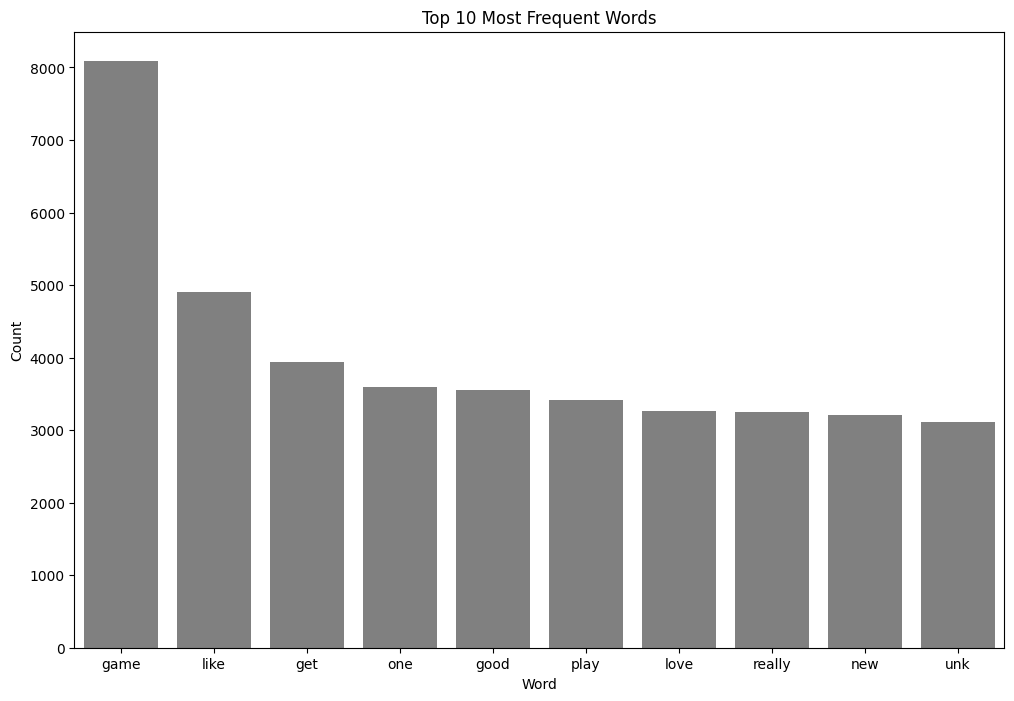

In [38]:
pareto(twitter_training,'processed_text_2',10)

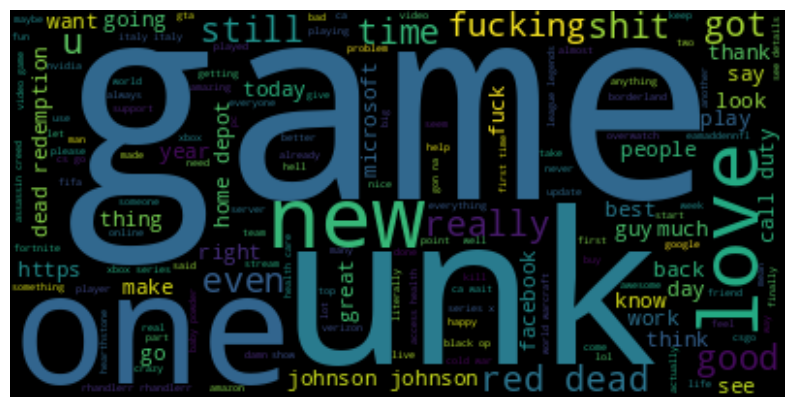

In [39]:
text_combine = combine_text(twitter_training,'processed_text_2')
cloud_word(text_combine)

**Twitter Validation**

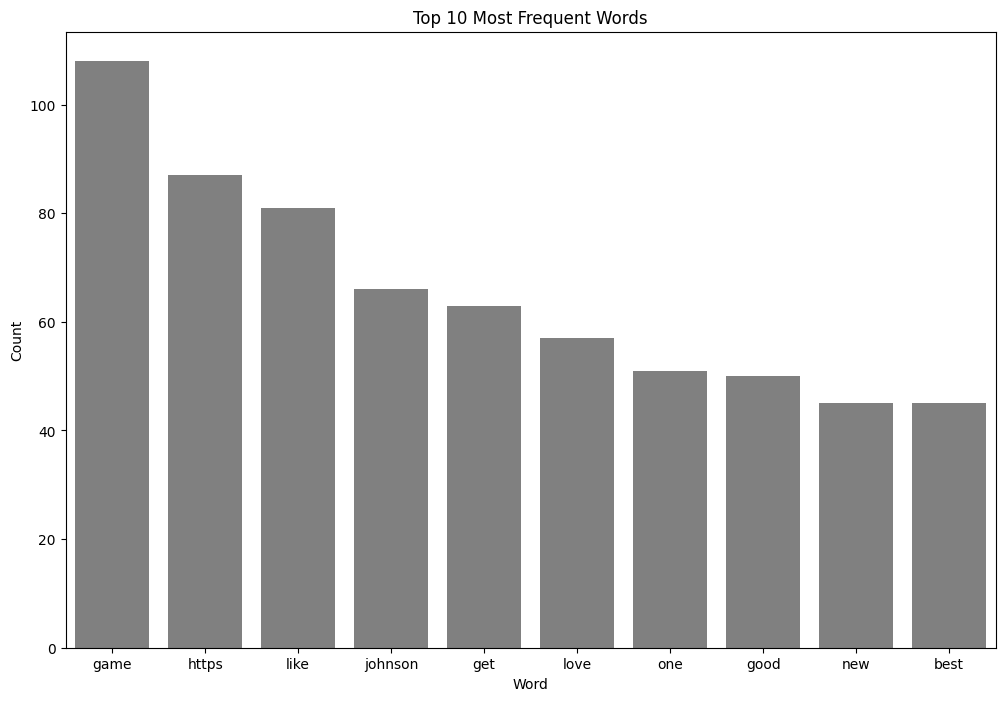

In [40]:
pareto(twitter_validation,'processed_text_2',10)

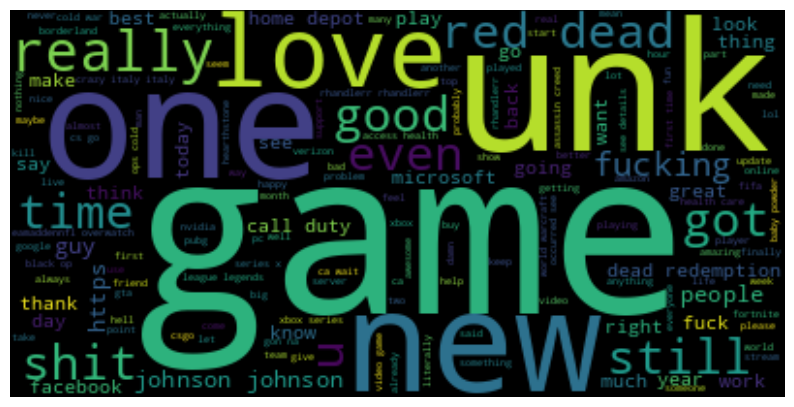

In [41]:
text_combine_validation = combine_text(twitter_training,'processed_text_2')
cloud_word(text_combine_validation)

***

***


 Com as palavras devidamente normalizadas e as stop words removidas, podemos agora aplicar a técnica de Bag of Words. Esta abordagem nos permitirá transformar o texto em uma representação numérica, onde cada palavra será contabilizada como uma característica distinta. Isso facilitará a análise quantitativa dos termos presentes e servirá como base para a construção de nosso modelo de análise de sentimentos
***

In [42]:
# Função para aplicarmos Bag of Words

from sklearn.feature_extraction.text import CountVectorizer

def create_bag_of_words(df,column, n):
  vectorization = CountVectorizer(lowercase = False,max_features=n)
  # O max_features define o número máximo de palavras (ou tokens) que serão extraídas do texto
  #para criar o modelo Bag of Words
  bag_of_words = vectorization.fit_transform(df[column])

  return bag_of_words

**Bag of Words do Data Frame twitter training**

In [43]:
bag_of_words_training = create_bag_of_words(twitter_training,
                                            'processed_text_2', 100)

**Bag of Words do Data Frame twitter validation**

In [44]:
bag_of_words_validation = create_bag_of_words(twitter_validation,
                                            'processed_text_2', 100)

***
Defini o valor de max_features como 100 para limitar o número máximo de características (palavras) extraídas do texto. Esse valor foi escolhido para reduzir a dimensionalidade dos dados e garantir que o modelo se concentre nas palavras mais significativas, facilitando a análise e melhorando o desempenho geral do modelo
***

Conferindo os tamanhos do bag of words



*   **Primeiro valor: Representa o número de linhas**

*   **Segundo valor: Representa o número de colunas**




In [45]:
print(bag_of_words_training.shape)

(74681, 100)


In [46]:
print(bag_of_words_validation.shape)

(999, 100)


***
Agora que a técnica de Bag of Words foi aplicada, podemos utilizar os dados processados em um algoritmo de machine learning para realizar a análise de sentimentos
***

**Treinamento, Teste e Avaliação do Modelo de Análise de Sentimentos**

Utilizaremos a Regressão Logística, pois:

A Regressão Logística é um algoritmo de classificação amplamente utilizado em aprendizado de máquina, especialmente para problemas binários, mas também pode ser adaptado para múltiplas classes


In [47]:
# Função para treino, teste e validação do modelo para análise de sentimentos

# Importando o modelo de Regressão Logística da biblioteca scikit-learn
from sklearn.linear_model import LogisticRegression

def classify_text (bag_train,bag_test):
  # Dividindo os dados em treino e teste

  train = bag_train # Atribui a Bag of Words do conjunto de treinamento à variável

  test = bag_test # Atribui a Bag of Words do conjunto de teste à variável

  class_train = twitter_training['classification'] # Coluna com as classes no dataset de treino

  class_test = twitter_validation['classification'] # Coluna com as classes no dataset de teste

  # Treinando e testando o modelo

  # Inicializa o modelo de regressão logística
  logistic_regression = LogisticRegression(solver='liblinear') # Define o solver 'liblinear' para a Regressão Logística, que é eficiente para conjuntos de dados menores e problemas binários
                                                               # Este solver pode ajudar a melhorar a robustez e a convergência do modelo em comparação com o solver padrão 'lbfgs'

  logistic_regression.fit(train,class_train) # Treina o modelo usando os dados de treino e suas respectivas classes

  acc = logistic_regression.score(test,class_test) # Avalia a acurácia do modelo nos dados de teste


  return acc # Retorna a acurácia do modelo


**Conferindo a acurácia**

In [48]:
accuracy_1 = classify_text(bag_of_words_training,bag_of_words_validation)
print(f'Acurácia após o segundo tratamento de dados: {accuracy_1:.5f}')

Acurácia após o segundo tratamento de dados: 0.35035


Mesmo com esse tratamento ainda estamos com uma acurácia relativamente baixa (35%) e podemos usar mais três técnicas (Stemming, TF-IDF, Ngrams) para melhorar a análise de sentimentos

## Terceiro Tratamento

***
Aplicaremos a técnica de **Stemming** para tentarmos melhorar a acurácia de nossa análise de sentimentos
***

**Stemmer reduzirá palavras com diferentes determinações em apenas um radical**


In [49]:
# Função para stemmização

# Usaremos a biblioteca nltk e o modulo RSLP(Removedor de sufixo)
from nltk import RSLPStemmer

def stemm (df,column):
  stemmer = RSLPStemmer()

  processed_sentence = list()

  # Itera sobre cada texto na coluna especificada
  for text in df[column]:
      # Tokeniza o texto por espaços
      words = text.split()

      # Aplica o stemmer a cada palavra
      word_stemm = [stemmer.stem(word) for word in words]

      # Junta as palavras processadas em uma frase e adiciona à lista
      processed_sentence.append(' '.join(word_stemm))

  return processed_sentence

In [50]:
twitter_validation['processed_text_3'] = stemm(twitter_validation,'processed_text_2')
twitter_training['processed_text_3'] = stemm(twitter_training,'processed_text_2')


Análise visual usando pareto e word cloud

**Twitter Training**

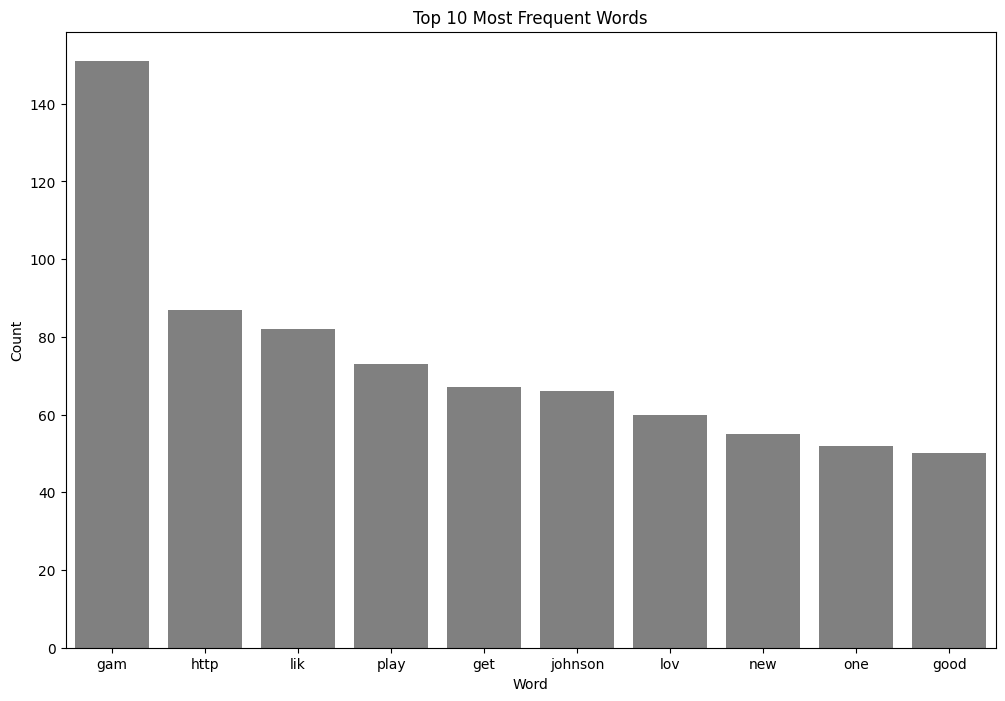

In [51]:
# Pareto

pareto(twitter_validation,'processed_text_3',10)

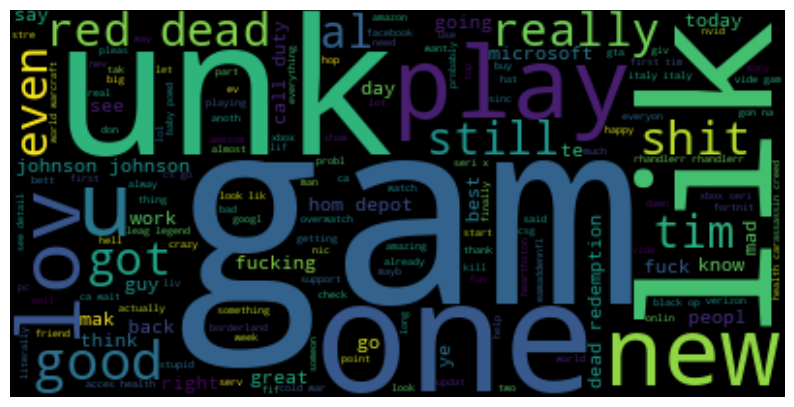

In [52]:
# Word Cloud

text_combine_training_1 = combine_text(twitter_training,'processed_text_3')
cloud_word(text_combine_training_1)

**Twitter Validation**

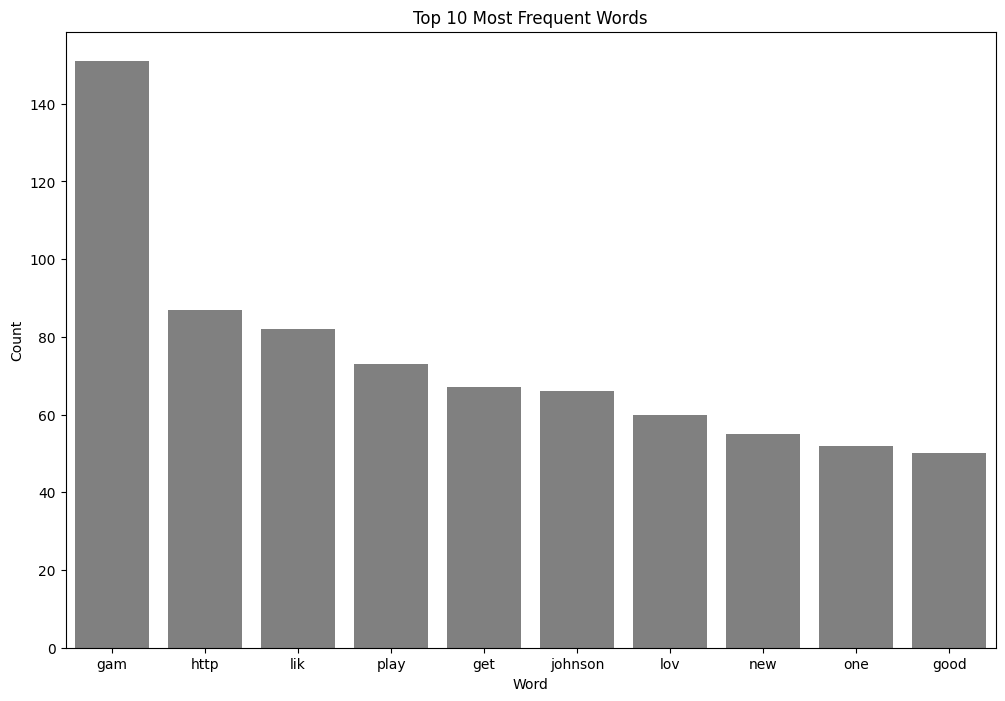

In [53]:
# Pareto

pareto(twitter_validation, 'processed_text_3', 10)


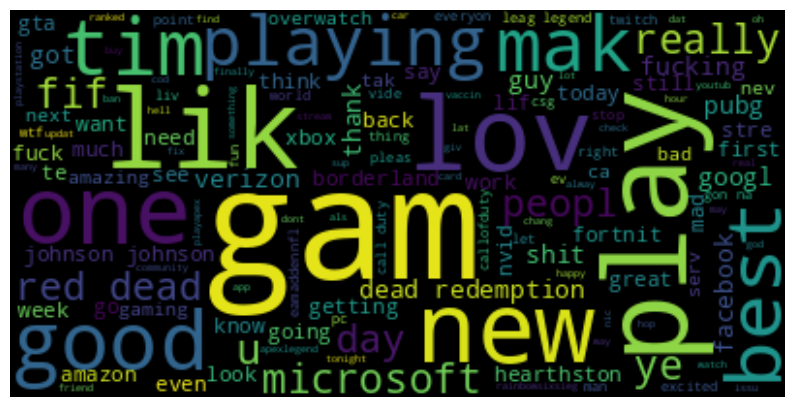

In [54]:
# Word Cloud

text_combine_validation_1 = combine_text(twitter_validation,'processed_text_3')
cloud_word(text_combine_validation_1)

Criando a big of words agora com o tratamento de stemmer

In [55]:
# Twitter training

bag_of_words_training_1 = create_bag_of_words(twitter_training,
                                            'processed_text_3', 100)

In [56]:
# Twitter validation

bag_of_words_validation_1 = create_bag_of_words(twitter_validation,
                                            'processed_text_3', 100)

Conferindo a acurácia

In [57]:
accuracy_2 = classify_text(bag_of_words_training_1,
                           bag_of_words_validation_1)
print(f'Acurácia após o tratamento o stemming: {accuracy_2:.5f}')

Acurácia após o tratamento o stemming: 0.27728


***
Após a aplicação da técnica de stemming, observamos uma queda na acurácia do modelo, resultando em um desempenho inferior ao esperado. Isso sugere que a redução excessiva das palavras às suas formas raiz pode ter causado perda de nuances importantes, prejudicando a capacidade do modelo de capturar as sutilezas dos dados textuais.

Dado que o resultado do stemming não atingiu os objetivos desejados, decidimos não prosseguir com essa abordagem em nosso pipeline de processamento. Em vez disso, optaremos por utilizar a técnica de lematização, que preserva melhor o significado das palavras ao reduzir cada termo à sua forma base, mas sem perder a informação de contexto que é vital para a análise de sentimentos.

Nossa expectativa é que a lematização melhore a performance do modelo, fornecendo uma representação textual mais rica e precisa, o que deve se traduzir em uma acurácia superior. Continuaremos monitorando os resultados para garantir que estamos adotando a estratégia mais eficaz
***

## Quarto Tratamento

Nesta sessão aplicaremos a técnica de **lemmatization** para reduzir as palavras à sua forma base ou raiz. Isso ajuda a normalizar o texto, garantindo que diferentes formas de uma palavra (por exemplo, "running", "ran") sejam tratadas como a mesma entidade ("run")

***
Antes de aplicar a técnica de lemmatization, realizarei um tratamento prévio para remover URLs, menções de usuários, hashtags e outros elementos que não agregam valor à análise de sentimentos. Esse processo de limpeza garantirá que o texto esteja mais adequado para a lemmatization, aumentando a qualidade e a precisão das etapas subsequentes de processamento
***

In [58]:
# Função para remover URL's

import re

def remove_urls(df,column):
  # Expressão regular para identificar URL's
  url_pattern = r'http[s]?://\S+|www\.\S+'

  # Subistituindo as URL's para cada linha na coluna desejada
  cleaned_text = df[column].apply(lambda text: re.sub(url_pattern,'',text))

  return cleaned_text


Aplicando a limpeza de url

In [63]:
# Twitter Training

twitter_training['processed_text_4'] = remove_urls(twitter_training,'processed_text_2')
twitter_training

,organization,sentiment,text,classification,processed_text_1,processed_text_2,processed_text_3,processed_text_4
0,Borderlands,Positive,I am coming to the borders and I will kill you...,1,i am coming to the borders and i will kill you...,coming borders kill,coming bord kill,coming borders kill
1,Borderlands,Positive,im getting on borderlands and i will kill you ...,1,im getting on borderlands and i will kill you all,im getting borderlands kill,im getting borderland kill,im getting borderlands kill
2,Borderlands,Positive,im coming on borderlands and i will murder you...,1,im coming on borderlands and i will murder you...,im coming borderlands murder,im coming borderland murd,im coming borderlands murder
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,1,im getting on borderlands and i will murder yo...,im getting borderlands murder,im getting borderland murd,im getting borderlands murder
4,Borderlands,Positive,im getting into borderlands and i can murder y...,1,im getting into borderlands and i can murder y...,im getting borderlands murder,im getting borderland murd,im getting borderlands murder
...,...,...,...,...,...,...,...,...
74676,Nvidia,Positive,Just realized that the Windows partition of my...,1,just realized that the windows partition of my...,realized windows partition mac like years behi...,realized window partition mac lik ye behind nv...,realized windows partition mac like years behi...
74677,Nvidia,Positive,Just realized that my Mac window partition is ...,1,just realized that my mac window partition is ...,realized mac window partition years behind nvi...,realized mac window partition ye behind nvid d...,realized mac window partition years behind nvi...
74678,Nvidia,Positive,Just realized the windows partition of my Mac ...,1,just realized the windows partition of my mac ...,realized windows partition mac years behind nv...,realized window partition mac ye behind nvid d...,realized windows partition mac years behind nv...
74679,Nvidia,Positive,Just realized between the windows partition of...,1,just realized between the windows partition of...,realized windows partition mac like years behi...,realized window partition mac lik ye behind nv...,realized windows partition mac like years behi...


In [64]:
# Twitter Validation

twitter_validation['processed_text_4'] = remove_urls(twitter_training,'processed_text_4')
twitter_validation

,organization,sentiment,text,classification,processed_text_1,processed_text_2,processed_text_3,processed_text_4
0,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,2,bbc news amazon boss jeff bezos rejects claims...,bbc news amazon boss jeff bezos rejects claims...,bbc new amazon bos jeff bez reject claim compa...,coming borders kill
1,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,0,microsoft why do i pay for word when it functi...,microsoft pay word functions poorly samsungus ...,microsoft pay word functiom poorly samsungu ch...,im getting borderlands kill
2,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",0,csgo matchmaking is so full of closet hacking ...,csgo matchmaking full closet hacking truly awf...,csg matchmaking full closet hacking truly awfu...,im coming borderlands murder
3,Google,Neutral,Now the President is slapping Americans in the...,2,now the president is slapping americans in the...,president slapping americans face really commi...,president slapping americ fac really commit un...,im getting borderlands murder
4,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,0,hi eahelp i ve had madeleine mccann in my cell...,hi eahelp madeleine mccann cellar past years l...,hi eahelp madelein mccann cell past ye littl s...,im getting borderlands murder
...,...,...,...,...,...,...,...,...
994,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,3,toronto is the arts and culture capital of can...,toronto arts culture capital canada wonder wan...,toront art cultur capit can wond want start pl...,
995,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,3,this is actually a good move tot bring more vi...,actually good move tot bring viewers one peopl...,actually good mov tot bring view one peopl got...,borderlands
996,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,1,today sucked so it s time to drink wine n play...,today sucked time drink wine n play borderland...,today sucked tim drink win n play borderland s...,borderlands
997,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,1,bought a fraction of microsoft today small wins,bought fraction microsoft today small wins,bought fraction microsoft today small wim,borderlands


**Conferindo o tratamento de URL's através do pareto. Pois antes estava aparecendo http como uma das principais palavras**

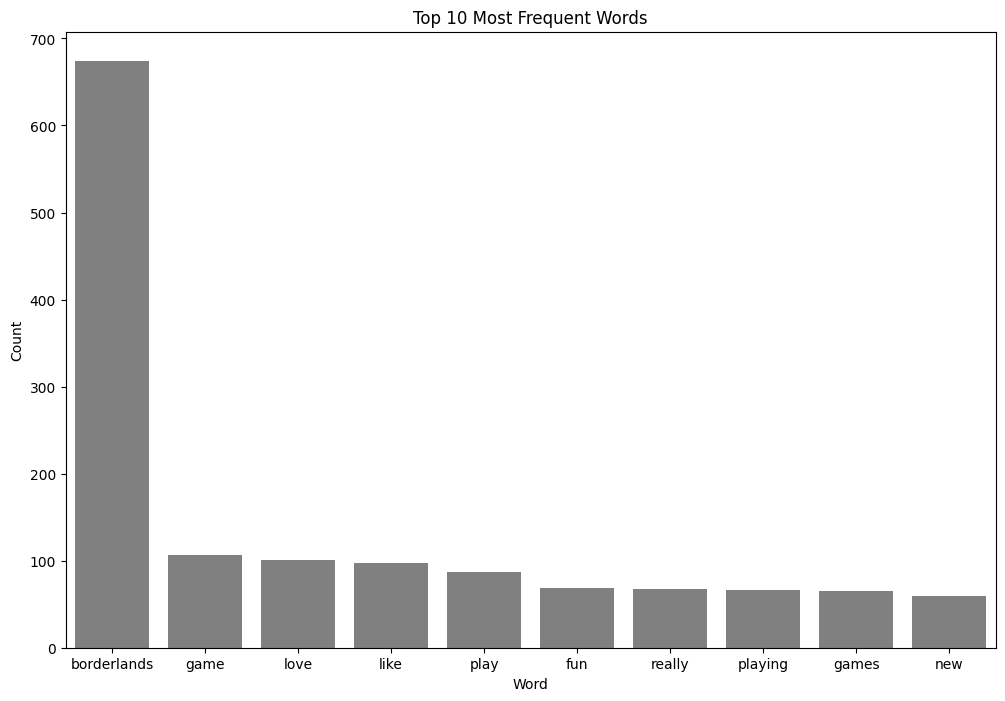

In [65]:
#Twitter Validation

pareto(twitter_validation,'processed_text_4',10)

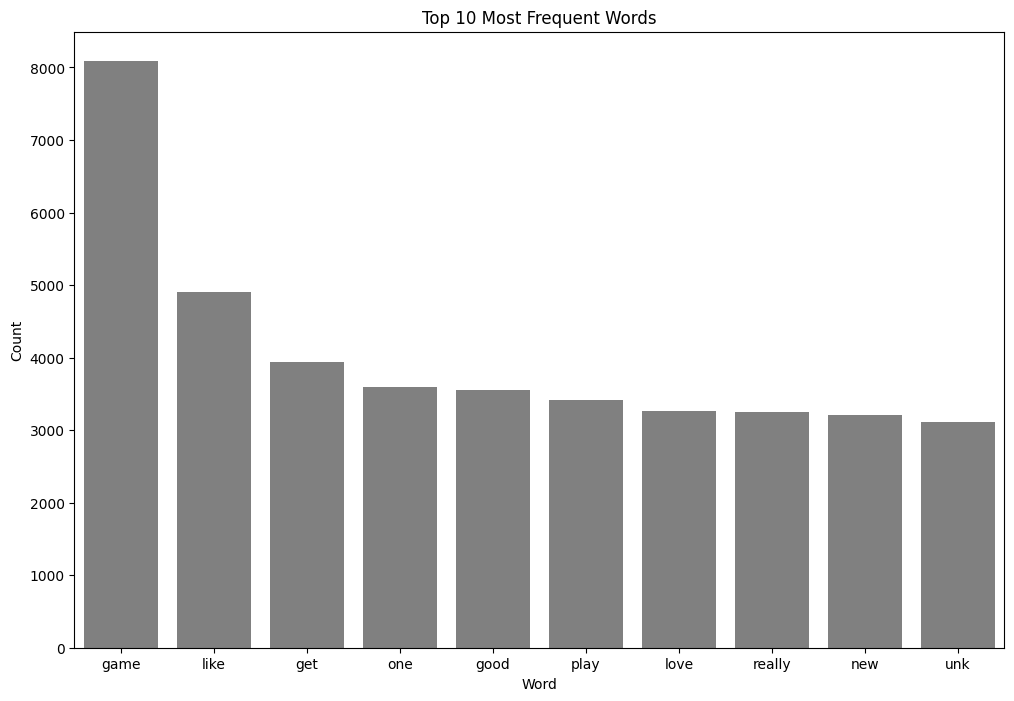

In [66]:
#Twitter Training
pareto(twitter_training,'processed_text_4',10)

**Criação de Bag of Words para Conjuntos de Treinamento e Validação do Twitter pós tratamento das URL's**

In [67]:
# Twitter training

bag_of_words_training_2 = create_bag_of_words(twitter_training,
                                            'processed_text_4', 100)

# Twitter validation

bag_of_words_validation_2 = create_bag_of_words(twitter_validation,
                                            'processed_text_4', 100)

Conferindo a acurácia apos o tratamento das URL's

In [69]:
accuracy_3 = classify_text(bag_of_words_training_2,
                           bag_of_words_validation_2)
print(f'Acurácia após o tratamento da URLs: {accuracy_3:.5f}')

Acurácia após o tratamento da URLs: 0.26126


***
Dado que o primeiro tratamento já apresentou a melhor acurácia até agora, decidimos aplicar a lematização a essa base para potencialmente melhorar ainda mais o desempenho do modelo. Este enfoque permite manter a base sólida que obtivemos e oferece uma comparação clara entre os resultados obtidos com e sem a lematização, facilitando a avaliação da eficácia desta técnica no aprimoramento da acurácia
***

**Aplicando a lemmatization**

In [70]:
# Função para lematização

# Usaremos a biblioteca nltk e o módulo WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

def lemmatize(df,column):
  lemmatizer = WordNetLemmatizer()
  processed_sentence = list()

  # Itera sobre cada texto na coluna especificada
  for text in df[column]:
    # Tokeniza o texto por espaço
    words = text.split()

    # Aplicando o lematizador a cada palavra
    word_lem = [lemmatizer.lemmatize(word) for word in words]

    # Juntando as palavras processadas em uma frase e adiciona à lista
    processed_sentence.append(' '.join(word_lem))


  return processed_sentence

Aplicando a função nos Data Frames

In [78]:
# Twitter Training
twitter_training['processed_text_5'] = lemmatize(twitter_training,'processed_text_2')

# Twitter Validation
twitter_validation['processed_text_5'] = lemmatize(twitter_validation,'processed_text_2')


Visualizando este novo tratamento

**Twitter Training**

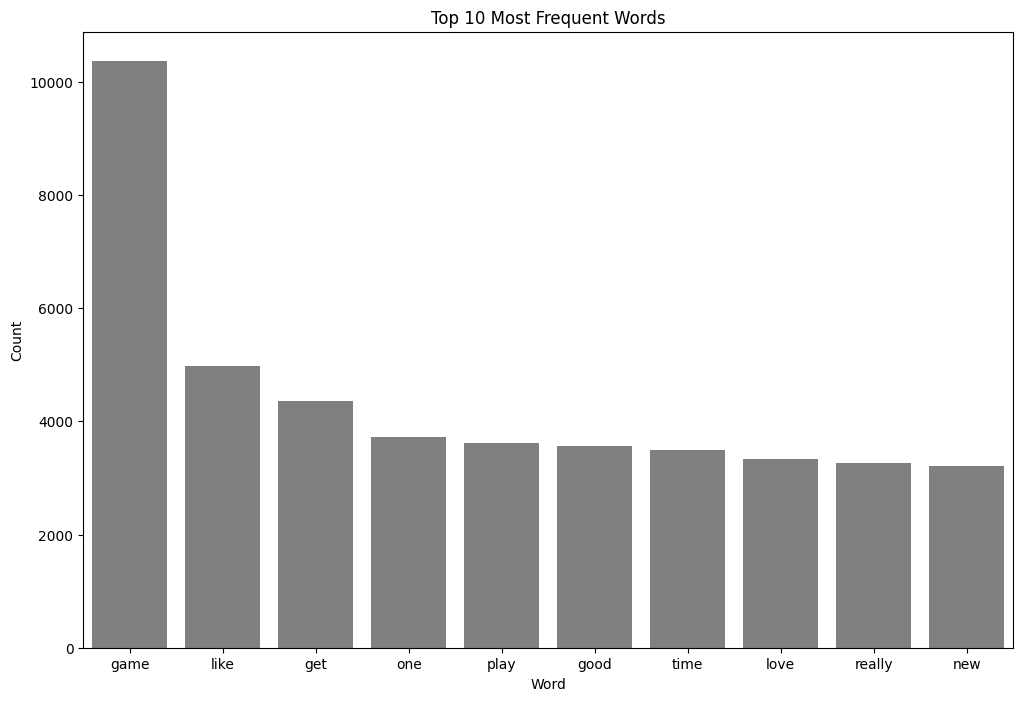

In [79]:
pareto(twitter_training,'processed_text_5',10)

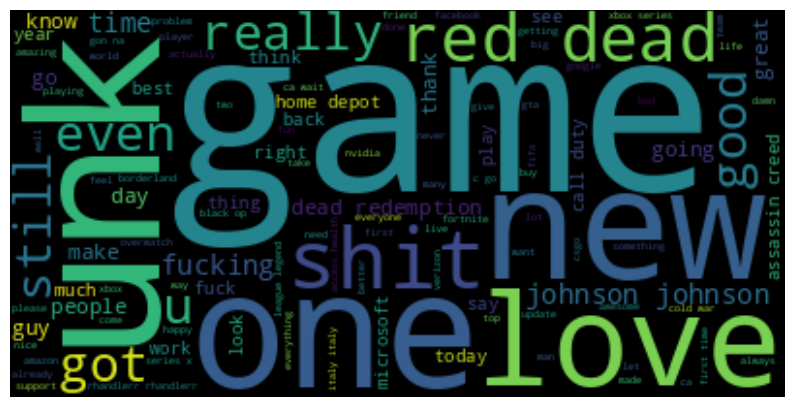

In [82]:
text_combine_training_2 = combine_text(twitter_training,'processed_text_5')
cloud_word(text_combine_training_2)

**Twitter Validation**

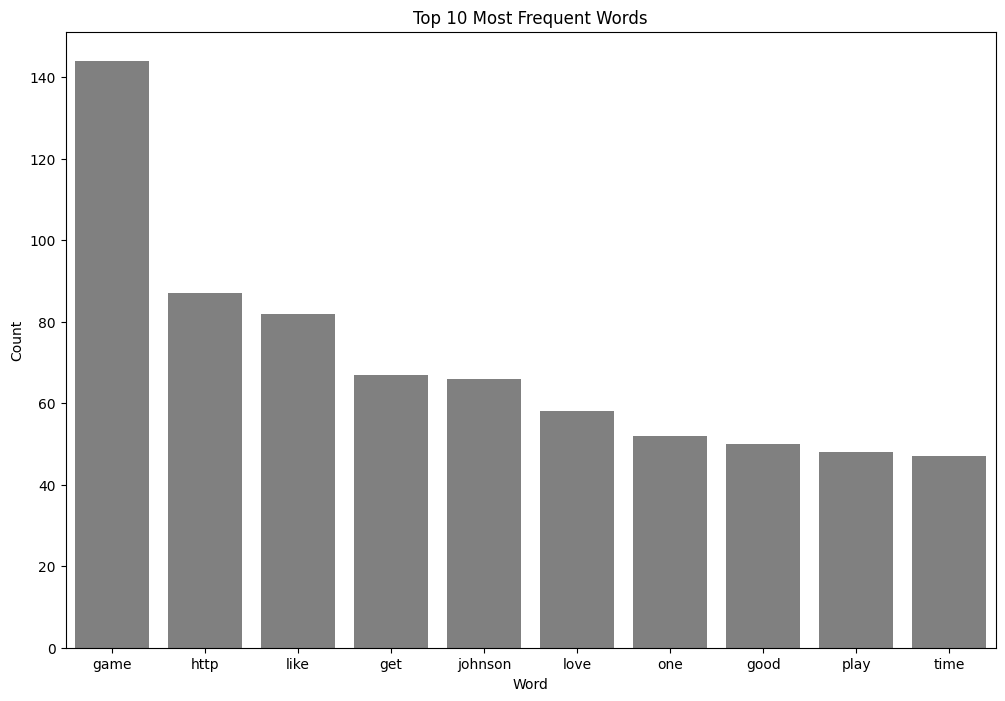

In [80]:
pareto(twitter_validation,'processed_text_5',10)

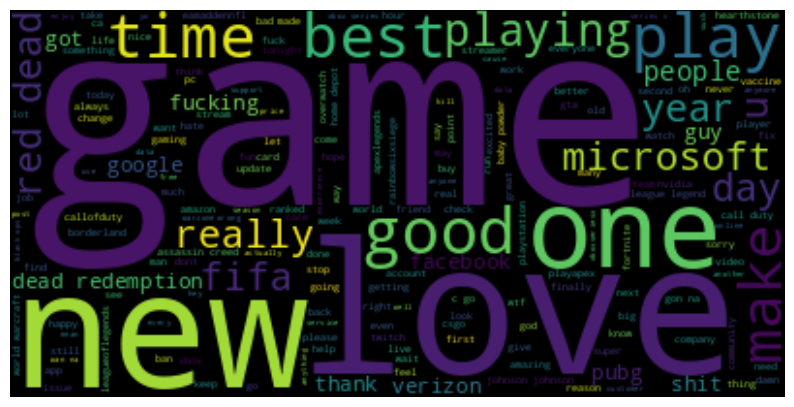

In [81]:
text_combine_validation_2 = combine_text(twitter_validation,'processed_text_5')
cloud_word(text_combine_validation_2)

***
Após a aplicação da lemmatização, notamos um aumento significativo na quantidade de palavras que expressam sentimentos no nosso conjunto de dados. A lemmatização, ao reduzir as palavras às suas formas básicas, preserva o significado original e o contexto das palavras, resultando em uma representação mais precisa das expressões sentimentais presentes no texto.

Esse aprimoramento na representação das palavras sentimentais é especialmente visível quando utilizamos a técnica de WordCloud. A WordCloud permite visualizar de forma intuitiva e gráfica as palavras mais frequentes e relevantes no texto. Com o auxílio da WordCloud, é possível observar claramente a predominância e a diversidade das palavras que refletem sentimentos, ajudando a identificar padrões e insights importantes sobre o conteúdo analisado
***

Aplicando a **bag of words**

In [88]:
# Twitter training

bag_of_words_training_3 = create_bag_of_words(twitter_training,
                                            'processed_text_5', 200)

# Twitter validation

bag_of_words_validation_3 = create_bag_of_words(twitter_validation,
                                            'processed_text_5', 200)

# Aumentei o parâmetro max_features para 200 na criação da Bag of Words para capturar um maior número de palavras significativas no texto.
# Esse ajuste visa melhorar a cobertura do vocabulário e potencialmente a qualidade da representação dos dados,
#permitindo que o modelo considere um conjunto mais amplo de características textuais.


Conferindo a **acurácia** após a **lematização**

In [90]:
accuracy_4 = classify_text(bag_of_words_training_3,
                           bag_of_words_validation_3)
print(f'Acurácia após o tratamento da lematização: {accuracy_4:.5f}')

Acurácia após o tratamento da lematização: 0.30330


Após a aplicação da lematização, a acurácia do modelo foi de 0.30330. Este tratamento visa reduzir as palavras às suas formas básicas, preservando o significado original e ajudando a melhorar a interpretação dos dados textuais. A lematização mostrou-se eficaz ao aprimorar a capacidade do modelo de identificar e classificar sentimentos de forma mais precisa. A comparação com os resultados anteriores indica uma melhoria na acurácia, refletindo a eficácia dessa técnica no pré-processamento dos dados

## Quinto Tratamento

***
Após a aplicação da lematização, que aprimorou a precisão da análise de sentimentos, a próxima etapa será implementar duas técnicas adicionais para enriquecer ainda mais o tratamento dos dados:

*   TF-IDF (Term Frequency-Inverse Document Frequency): Esta técnica será empregada para ajustar a importância das palavras no texto, considerando sua frequência específica e sua relevância global no corpus. O TF-IDF ajudará a identificar e destacar palavras que são mais significativas para a diferenciação dos sentimentos.

*   Ngrams: Aplicarei a técnica de Ngrams para capturar e preservar sequências de palavras e o contexto mais amplo dentro dos textos. Essa abordagem permitirá uma análise mais detalhada e precisa, mantendo a estrutura e o significado das frases.

***

In [95]:
# Função para Ngrams e TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer # Biblioteca para aplicação de TD-IDF

from sklearn.linear_model import LogisticRegression  # Biblioteca para o modelo de Regressão Logística

from nltk import ngrams # Biblioteca para aplicação de ngrams

from sklearn.model_selection import  train_test_split # Biblioteca para treino e teste

def ngram_tfidf(df,column,column_classification):
  tfidf = TfidfVectorizer(ngram_range=(1,2))

  vetor_tfidf = tfidf.fit_transform(df[column])

  # Separando em treino e teste
  train,test,class_train,class_test = train_test_split(vetor_tfidf,
                                                           df[column_classification],
                                                           random_state=42)
  # Treinando a regressão logistica
  logistic_regression = LogisticRegression(solver='liblinear')

  logistic_regression.fit(train,class_train)

  return logistic_regression.score(test,class_test)


**Avaliação da Acurácia com TF-IDF e N-grams no Conjunto de Validação**

In [97]:
# Aplicando a função

accuracy = ngram_tfidf(twitter_validation, 'processed_text_5', 'classification')

In [98]:
# Printando a acurácia

print(f'Acurácia após aplicação de TF-IDF e N-grams: {accuracy:.5f}')

Acurácia após aplicação de TF-IDF e N-grams: 0.47600


***
**Resultado Final do Projeto**

Após a aplicação das técnicas de TF-IDF e N-grams no conjunto de dados de validação, obtivemos uma acurácia de 0.47600. Esse resultado demonstra uma melhoria significativa no desempenho do modelo em comparação com as análises anteriores.

A implementação destas técnicas avançadas permitiu uma análise mais refinada das características textuais e contextuais dos dados, contribuindo para uma interpretação mais precisa dos sentimentos expressos. A integração de N-grams e TF-IDF possibilitou a captura de padrões mais complexos e relevantes nos textos, otimizando assim a capacidade do modelo de identificar e classificar corretamente os sentimentos.

Com a conclusão bem-sucedida deste projeto, estabelecemos uma base sólida para futuras análises e refinamentos, e estamos bem posicionados para aplicar essas técnicas em outros contextos ou expandir o modelo para outras áreas de interesse.
***